# Bar Chart

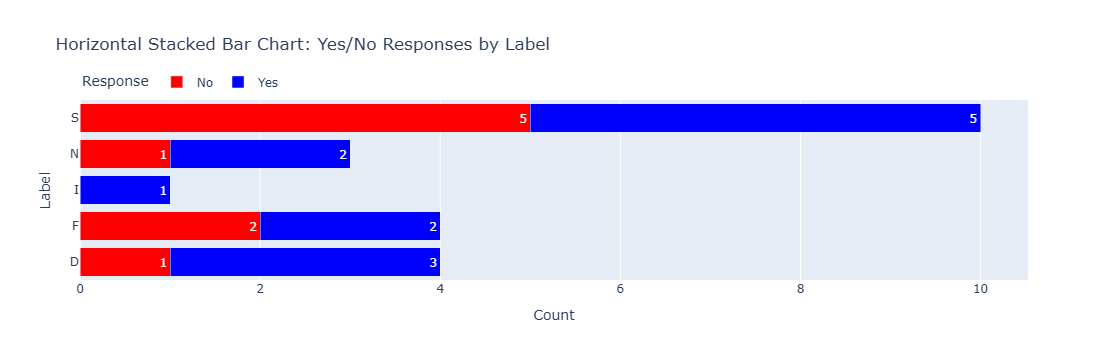

In [36]:
import pandas as pd
import plotly.express as px

# Step 1: Read the CSV file
df = pd.read_csv('bar_assignment.csv')

# Step 2: Transform 1 -> "Yes" and 0 -> "No"
df['COUNT'] = df['COUNT'].replace({1: 'Yes', 0: 'No'})

# Step 3: Group by LABEL and COUNT, then count occurrences
grouped_df = df.groupby(['LABEL', 'COUNT']).size().reset_index(name='TOTAL')

# Step 4: Sort the DataFrame alphabetically by LABEL
grouped_df = grouped_df.sort_values(by='LABEL')

# Step 5: Create the horizontal stacked bar chart
fig = px.bar(
    grouped_df, 
    x='TOTAL', 
    y='LABEL', 
    color='COUNT', 
    orientation='h', 
    barmode='stack',
    labels={'TOTAL': 'Count', 'LABEL': 'Label', 'COUNT': 'Response'},
    title='Horizontal Stacked Bar Chart: Yes/No Responses by Label',
    color_discrete_map={'Yes': 'blue', 'No': 'red'}  # Set colors for Yes and No
)

# Step 6: Move the legend to the top-left and arrange it horizontally
fig.update_layout(
    legend=dict(
        title='Response',
        orientation='h',  # Horizontal legend
        yanchor='bottom',  # Anchor legend at the bottom
        y=1.02,  # Position legend above the chart
        xanchor='left',  # Anchor legend to the left
        x=0  # Position legend at the left
    )
)

# Step 7: Add bar labels (values) at the tail end of each bar
fig.update_traces(
    textposition='inside',  # Place text outside the bars
    texttemplate='%{x}',  # Display the value of each bar segment
)

# Step 8: Force alphabetical sorting on the y-axis
fig.update_yaxes(categoryorder='array', categoryarray=sorted(grouped_df['LABEL'].unique()))

# Show the plot
fig.show()

# Sankey Diagram

# Network Graph